# The landscape of binding affinity functional space
Note: move out to the root folder before running. 

In [1]:
import pandas as pd
from topo_reg import calculate_distance
from sklearn.manifold import MDS

df = pd.read_parquet("data/fitness_embeddings/Seqs_Fitness.parquet").sample(500)

In [2]:
dist_all = pd.DataFrame(
            calculate_distance.SW_x_train_p(df, None, df.index, submtr=None),
            index=df.index)

 Smith-Waterman distance: 500 / 500	



In [3]:
mds = MDS(random_state=2022, dissimilarity='precomputed')

xy = pd.DataFrame(
        mds.fit_transform(dist_all),
        index=dist_all.index,
        columns=['x', 'y']
    )

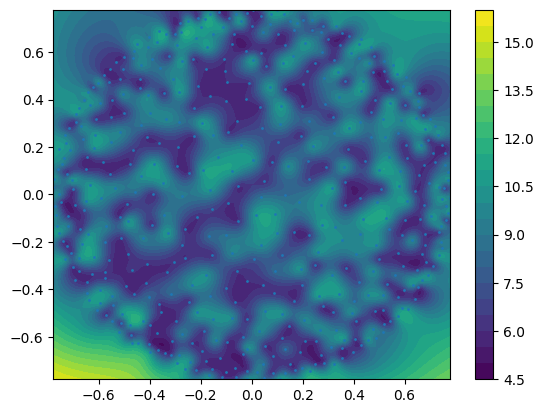

In [4]:
from scipy.interpolate import griddata, Rbf
import numpy as np
import matplotlib.pyplot as plt

#%% interpolate and plot
x = xy['x'].values
y = xy['y'].values
z = df.fitness


xi = np.linspace(min(x), max(x), 300)
yi = np.linspace(min(y), max(y), 300)

zi = griddata(xy.values, z, (xi[None, :], yi[:, None]), method='linear')

# or
xi, yi = np.meshgrid(xi, yi)
func = Rbf(x, y, z, kind='gaussian', epsilon=0.02, smooth=0.1)
zi = func(xi, yi)

plt.figure()
plt.contourf(xi, yi, zi, levels=25)
# plt.pcolormesh(xi, yi, zi)
plt.colorbar()

plt.scatter(x, y, s=1)

plt.savefig("protein_binding_landscape.eps", dpi=300)
plt.show()